<a href="https://colab.research.google.com/github/RonaldManoelScientist/Deteccao_de_Spams/blob/main/Classifica%C3%A7%C3%A3o_de_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de SPAM
O Objetivo dessa análise é verificar os padrões que levam o usuario a receber na sua caixa de entrada Email indesejados os SPAM'S

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('/content/drive/MyDrive/Datasets/Email/emails.csv')

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(5172, 3002)

In [ ]:
df.value_counts().sum()

5172

In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

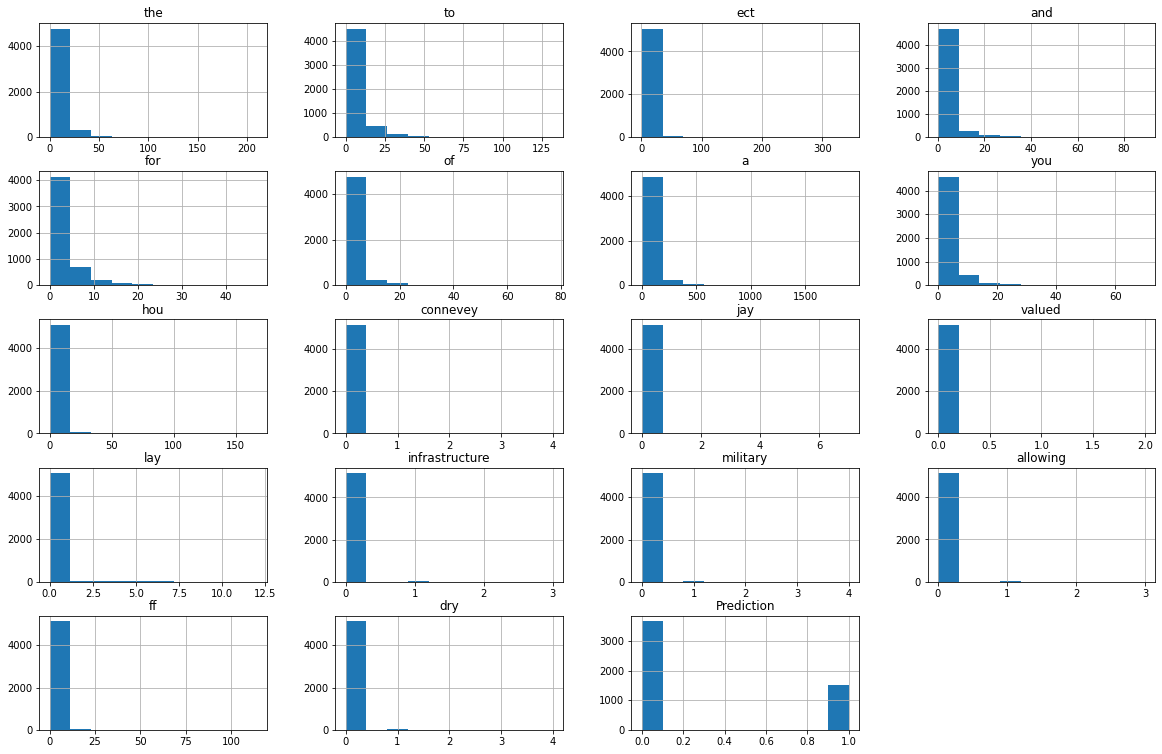

In [ ]:
df[['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
        'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction']].hist(figsize= (20,13));
sns.set()

In [ ]:
corr = df[['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
        'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction']].corr()

display(corr)

,the,to,ect,and,for,of,a,you,hou,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
of,0.796397,0.752722,0.178028,0.809665,0.681457,1.000000,0.715502,0.420209,0.128963,-0.000969,0.067817,0.332653,0.250289,0.132294,0.073004,0.108786,0.444252,0.026403,0.197234
a,0.784451,0.896466,0.400009,0.815196,0.744098,0.715502,1.000000,0.442994,0.373170,0.020802,0.116940,0.211254,0.301433,0.114222,0.111685,0.105358,0.464473,0.093822,0.107776
you,0.471392,0.508513,0.155783,0.476764,0.495852,0.420209,0.442994,1.000000,0.149159,0.038502,0.026415,0.071191,0.188605,0.062744,0.006498,0.082757,0.195058,0.028883,0.130293
hou,0.303621,0.347993,0.974152,0.235953,0.329051,0.128963,0.373170,0.149159,1.000000,0.129699,0.046898,0.012287,0.050420,-0.001885,0.005429,-0.000966,0.114210,0.000601,-0.128340
connevey,0.008926,0.013250,0.134339,0.005151,0.022168,-0.000969,0.020802,0.038502,0.129699,1.000000,0.051937,-0.004331,0.001448,-0.002100,-0.002249,-0.002675,0.005403,-0.003373,-0.030375


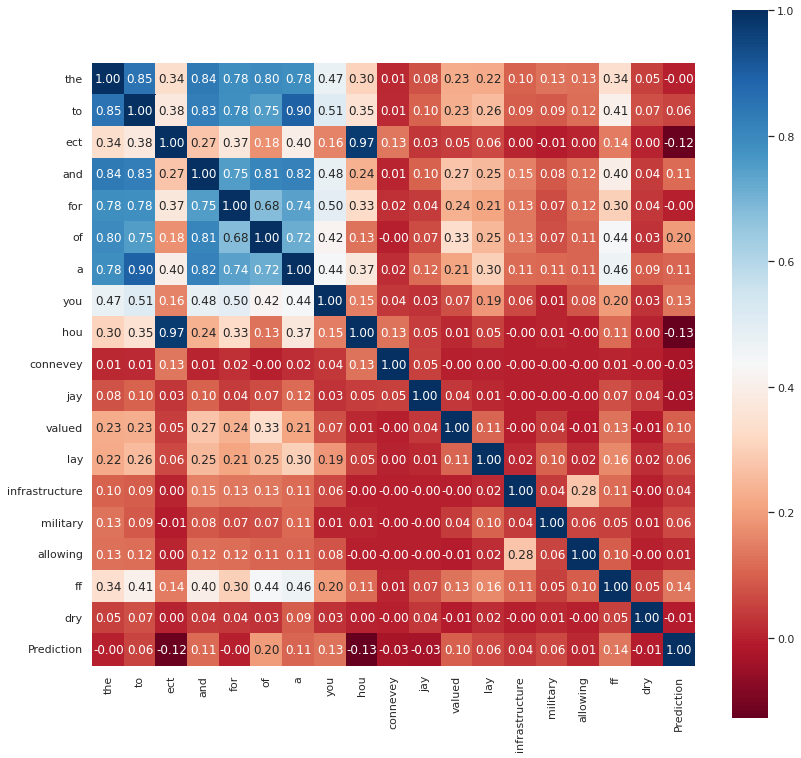

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.tight_layout();

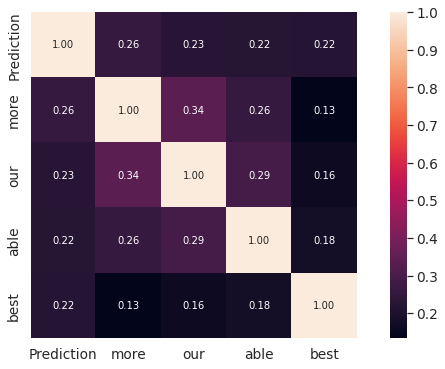

In [ ]:
k= 5 # Número de valores para selecionar

plt.figure(figsize=(12,6)); # Selecionando o tamanho da figura/grafico

corrmat = df.corr() # Montando a matriz correlação

# Plotando as 5 melhores correlações
cols = corrmat.nlargest(n=k,columns= 'Prediction')['Prediction'].index

# Matriz do coeficiente de correlação das variáveis.
matriz_correlacao = np.corrcoef(df[cols].values.T)


# Montando grafico
sns.set(font_scale=1.25)

hm = sns.heatmap(data = matriz_correlacao, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## Variáveis Target
`df['more'], ['our'], ['able'], ['best']`

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['more','our','able']]
y = df['Prediction']

x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)

In [ ]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Validação', linhas_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_train, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_train, y_train)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acurácia", acc)

Treino 2586
Validação 2586

Acurácia 0.7463263727764888
Treino 2586
Validação 2586

Acurácia 0.751353441608662
Treino 2586
Validação 2586

Acurácia 0.748646558391338
Treino 2586
Validação 2586

Acurácia 0.734338747099768
Treino 2586
Validação 2586

Acurácia 0.7443928847641145
Treino 2586
Validação 2586

Acurácia 0.742846094354215
Treino 2586
Validação 2586

Acurácia 0.745552977571539
Treino 2586
Validação 2586

Acurácia 0.7525135344160866
Treino 2586
Validação 2586

Acurácia 0.7579273008507347
Treino 2586
Validação 2586

Acurácia 0.7385924207269915
Treino 2586
Validação 2586

Acurácia 0.745552977571539
Treino 2586
Validação 2586

Acurácia 0.7540603248259861
Treino 2586
Validação 2586

Acurácia 0.7498066511987626
Treino 2586
Validação 2586

Acurácia 0.7602474864655839
Treino 2586
Validação 2586

Acurácia 0.7405259087393659
Treino 2586
Validação 2586

Acurácia 0.751353441608662
Treino 2586
Validação 2586

Acurácia 0.7420726991492653
Treino 2586
Validação 2586

Acurácia 0.7521268368136118

In [ ]:
  acc = np.mean(acc)
  acc

0.7490332559938129

In [ ]:
from sklearn.metrics import classification_report
print(f'Relatório de Classificação: \n{classification_report(y_valid, p, digits=4)}')

Relatório de Classificação: 
              precision    recall  f1-score   support

           0     0.7703    0.9197    0.8384      1830
           1     0.6334    0.3360    0.4391       756

    accuracy                         0.7490      2586
   macro avg     0.7018    0.6278    0.6387      2586
weighted avg     0.7302    0.7490    0.7216      2586



## 2° Tentativa a correta

In [ ]:
X = df.drop(['Prediction', 'Email No.'], axis=1)
y = df['Prediction']

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)

In [ ]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_valid in kf.split(X):
    print('Treino', linhas_treino.shape[0])
    print('Validação', linhas_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_train, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_train, y_train)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acurácia", acc)

Treino 2586
Validação 2586

Acurácia 0.9663573085846868
Treino 2586
Validação 2586

Acurácia 0.9578499613302398
Treino 2586
Validação 2586

Acurácia 0.965583913379737
Treino 2586
Validação 2586

Acurácia 0.9621036349574633
Treino 2586
Validação 2586

Acurácia 0.9702242846094354
Treino 2586
Validação 2586

Acurácia 0.960170146945089
Treino 2586
Validação 2586

Acurácia 0.9694508894044856
Treino 2586
Validação 2586

Acurácia 0.962877030162413
Treino 2586
Validação 2586

Acurácia 0.9675174013921114
Treino 2586
Validação 2586

Acurácia 0.9605568445475638
Treino 2586
Validação 2586

Acurácia 0.9621036349574633
Treino 2586
Validação 2586

Acurácia 0.9648105181747874
Treino 2586
Validação 2586

Acurácia 0.9671307037896365
Treino 2586
Validação 2586

Acurácia 0.9644238205723125
Treino 2586
Validação 2586

Acurácia 0.9632637277648879
Treino 2586
Validação 2586

Acurácia 0.9682907965970611
Treino 2586
Validação 2586

Acurácia 0.97138437741686
Treino 2586
Validação 2586

Acurácia 0.95901005413766

In [ ]:
  acc = np.mean(acc)
  acc

0.9663573085846868

In [ ]:
from sklearn.metrics import classification_report
print(f'Relatório de Classificação: \n{classification_report(y_valid, p, digits=4)}')


Relatório de Classificação: 
              precision    recall  f1-score   support

           0     0.9786    0.9738    0.9762      1830
           1     0.9373    0.9484    0.9428       756

    accuracy                         0.9664      2586
   macro avg     0.9579    0.9611    0.9595      2586
weighted avg     0.9665    0.9664    0.9664      2586

